In [5]:
from int_field import ZetaInt, ZSqrt2Int
import numpy as np
from sympy import factorint



def find_within_interval(x0, x1, y0, y1) -> ZSqrt2Int:
    # Lemma 17 from Selinger synthesis
    # produces some r, rdot over Z[rho] such that
    # r \in (x0, x1) and rdot \in (y0, y1)
    assert x0 < x1
    assert y0 < y1
    assert np.abs((x1 - x0) * (y1 - y0)) > (1 + np.sqrt(2))**2
    
    delta = (x1 - x0)
    Delta = (y1 - y0)
    assert delta * Delta >= (1 + np.sqrt(2))**2
    
    # find a, b
    a = int(np.floor((x0 + y0 + Delta) / 2)) + 1
    b = int(np.floor((x0 - y0 - Delta) / (2 * np.sqrt(2)))) + 1
    
    assert a - 1 <= (x0 + y0 + Delta) / 2
    assert (b - 1) * np.sqrt(2) <= (x0 - y0 - Delta) / 2
    
    # assess cases:
    if a - b * np.sqrt(2) <= y0 + Delta: # Case 1
        return ZSqrt2Int((a, b))
    
    if a - b * np.sqrt(2) > y0 + Delta and a + b * np.sqrt(2) <= x0 + 1: # Case 2
        return ZSqrt2Int((a, b + 1))
    
    if a - b * np.sqrt(2) > y0 + Delta and a + b * np.sqrt(2) > x0 + 1: # Case 3
        return ZSqrt2Int((a - 1, b))
    
    raise ValueError("Should not happen")


def enumerate_1d(x0, x1, y0, y1):
    # finds all alpha \in Z[\sqrt{2}] such that:
    # alpha \in [x0, x1] and alpha^* \in [y0, y1]
        
    assert x0 < x1, f"x0={x0}, x1={x1}"
    assert y0 < y1, f"y0={y0}, y1={y1}"
    
    # first, we need to adjust $A$, $B$ so that lambda^{-1} <= delta < 1
    # we want some k where lambda^{-1} <= delta * lambda^{-k} < 1
    # i.e. -1 <= log_{lambda}(delta) - k < 1
    # -1 + k <= log_{lambda}(delta) < 1 + k

    lambda_inv = -1 + np.sqrt(2)
    lambda_con = 1 + np.sqrt(2)
    init_delta = x1 - x0
    mult_offset = int(np.floor(np.log(init_delta) / np.log(lambda_con))) + 1
    
    x_offset = lambda_inv**mult_offset
    y_offset = (-1 * lambda_con)**mult_offset
    
    x0 = x_offset * x0
    x1 = x_offset * x1
    y0_t = y_offset * y0
    y1_t = y_offset * y1
    
    y0 = min(y0_t, y1_t)
    y1 = max(y0_t, y1_t)
    
    delta = x1 - x0
    assert lambda_inv <= delta < 1 or np.isclose(delta, lambda_inv), f"delta={delta}"
    
    # find all valid b's
    new_interval_0 = (x0 - y1) / np.sqrt(2**3)
    new_interval_1 = (x1 - y0) / np.sqrt(2**3)
    
    assert new_interval_0 < new_interval_1, f"new_interval_0={new_interval_0}, new_interval_1={new_interval_1}"
    
    raw_sols = []
    
    b_min = int(np.ceil(new_interval_0))
    b_max = int(np.floor(new_interval_1))
    
    for b_val in range(b_min, b_max + 1):
        a_min = int(np.ceil(x0 - b_val * np.sqrt(2)))
        a_max = int(np.floor(x1 - b_val * np.sqrt(2)))
        
        if a_min == a_max:
            candidate = ZSqrt2Int((a_min, b_val))
            if x0 <= candidate.eval() <= x1 and y0 <= (~candidate).eval() <= y1:
                raw_sols.append(candidate)
        else:
            pass
            # print(f"b={b_val}, a_min={a_min}, a_max={a_max}")
    
    # now return them back to our original interval
    if mult_offset < 0:
        lambda_cons = ZSqrt2Int((-1, 1))
        lambda_offset = lambda_cons**(-mult_offset)
    else:
        lambda_cons = ZSqrt2Int((1, 1))
        lambda_offset = lambda_cons**mult_offset
    
    sols = [lambda_offset * sol for sol in raw_sols]
    
    return sols

In [2]:
import int_field
import matplotlib.pyplot as plt

In [6]:
tt = np.array([[ -4.1421356, 9.94987437], [  9.94987437, -24.14213562]])

aa = np.array([[1, -2], [0, 1]])

aa.T @ tt @ aa

array([[ -4.1421356 ,  18.23414557],
       [ 18.23414557, -80.5101755 ]])

In [8]:
aa.T @ aa 

array([[ 1, -2],
       [-2,  5]])

In [7]:
np.array([[ -4.1421356 ,  18.23414557],
       [ 18.23414557, -80.5101755 ]])

array([[ -4.1421356 ,  18.23414557],
       [ 18.23414557, -80.5101755 ]])

In [4]:
ZSqrt2Int((-280, 198)).eval()

0.014285349872864117

In [5]:
enumerate_1d(0.01, 0.02, -1000, 1000)

[ZSqrt2Int((-280, 198)),
 ZSqrt2Int((-181, 128)),
 ZSqrt2Int((-41, 29)),
 ZSqrt2Int((58, -41)),
 ZSqrt2Int((198, -140)),
 ZSqrt2Int((297, -210))]

x0=80, x1=126, y0=-7, y1=-3
x0=66, x1=107, y0=-5, y1=-2
x0=86, x1=152, y0=-6, y1=-3
x0=84, x1=163, y0=6, y1=12
x0=51, x1=147, y0=2, y1=6
x0=77, x1=90, y0=-2, y1=4
x0=92, x1=123, y0=2, y1=9
x0=68, x1=139, y0=2, y1=7
x0=42, x1=119, y0=-1, y1=3
x0=60, x1=130, y0=4, y1=11


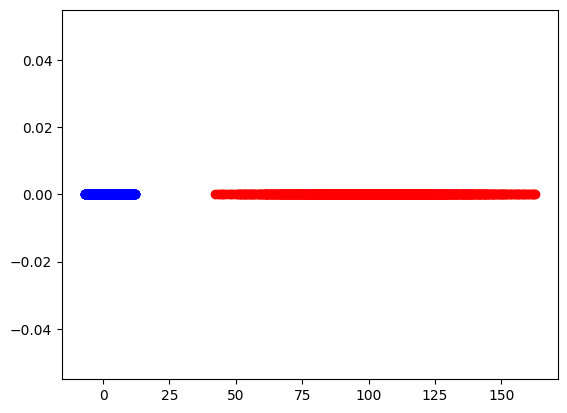

In [6]:
for _ in range(10):
    x0 = np.random.randint(-10, 100)
    delta = np.random.randint(1, 100)
    x1 = x0 + delta
    
    y0 = np.random.randint(-10, 10)
    Delta = np.random.randint(1, 10)
    y1 = y0 + Delta
    
    print(f"x0={x0}, x1={x1}, y0={y0}, y1={y1}")
    
    sols = enumerate_1d(x0, x1, y0, y1)
    
    for sol in sols:
        assert x0 <= sol.eval() <= x1, f"x0={x0}, x1={x1}, sol={sol.eval()}"
        assert y0 <= (~sol).eval() <= y1, f"y0={y0}, y1={y1}, sol={(~sol).eval()}"
    
    for sol in sols:
        plt.plot([sol.eval().real], [sol.eval().imag], 'ro')
        plt.plot([(~sol).eval().real], [(~sol).eval().imag], 'bo')

In [7]:
amin = 10
amax = 20
bmin = -80
bmax = -20

sols = enumerate_1d(amin, amax, bmin, bmax)

# scales in delta * Delta
# for delta * Delta = 6M -> ~20s
# Every 1M candidates takes about 3s

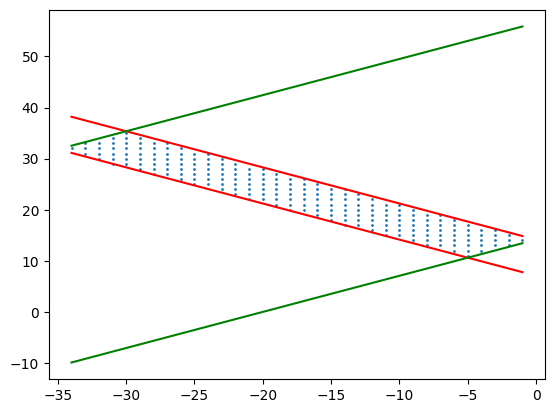

In [8]:
x_vals = [sol[0] for sol in sols]
y_vals = [sol[1] for sol in sols]
plt.scatter(x_vals, y_vals, s=1)

min_x = min(x_vals)
max_x = max(x_vals)

plotter_a = lambda x, c: (c - x) / np.sqrt(2)
plotter_b = lambda x, c: (x - c) / np.sqrt(2)

# plot alpha >= A_min
# x + y \sqrt{2} >= A_min
# y \sqrt{2} >= A_min - x
# y >= (A_min - x) / \sqrt{2}
plot_amin = lambda x: plotter_a(x, amin)
plt.plot([np.min(min_x), np.max(max_x)], [plot_amin(min_x), plot_amin(max_x)], color='red')

# plot alpha <= A_max
plot_amax = lambda x: plotter_a(x, amax)
plt.plot([np.min(min_x), np.max(max_x)], [plot_amax(min_x), plot_amax(max_x)], color='red')

# plot alpha^* >= B_min
# x - y \sqrt{2} >= B_min
# y \sqrt{2} <= x - B_min
# y <= (x - B_min) / \sqrt{2}
plot_bmin = lambda x: plotter_b(x, bmin)
plt.plot([np.min(min_x), np.max(max_x)], [plot_bmin(min_x), plot_bmin(max_x)], color='green')

# plot alpha^* <= B_max
plot_bmax = lambda x: plotter_b(x, bmax)
plt.plot([np.min(min_x), np.max(max_x)], [plot_bmax(min_x), plot_bmax(max_x)], color='green')


In [39]:
# we also need to solve 2D case

import itertools

def convert_to_zeta(x: ZSqrt2Int, y: ZSqrt2Int) -> ZetaInt:
    # take x + yi and convert it to zeta
    # note that:
    # x = d + (c - a)/2 \sqrt{2}
    # y = b + (c + a)/2 \sqrt{2} i
    # for a zeta^3 + b zeta^2 + c zeta + d
    
    # so we can identify a, b, c, d
    d = x[0]
    b = y[0]
    c_min_a_2 = x[1]
    c_plus_a_2 = y[1]
    
    c = c_min_a_2 + c_plus_a_2
    a = c_plus_a_2 - c_min_a_2
    
    return ZetaInt((d, c, b, a))


for _ in range(100):
    x = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    y = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    zeta = convert_to_zeta(x, y)
    assert np.isclose(x.eval() + 1j * y.eval(), zeta.eval()), f"x={x}, y={y}, zeta={zeta}"


def enumerate_2d(ax_min, ax_max, ay_min, ay_max, bx_min, bx_max, by_min, by_max):
    assert ax_min < ax_max, f"x0={ax_min}, x1={ax_max}"
    assert ay_min < ay_max, f"xi0={ay_min}, xi1={ay_max}"
    assert bx_min < bx_max, f"y0={bx_min}, y1={bx_max}"
    assert by_min < by_max, f"yi0={by_min}, yi1={by_max}"
    
    # using the uptight rectangles case
    # Case 1: u = a + bi 
    case_1 = []
    alpha_cands = enumerate_1d(ax_min, ax_max, bx_min, bx_max)
    beta_cands = enumerate_1d(ay_min, ay_max, by_min, by_max)
    
    for a_idx in range(len(alpha_cands)):
        for b_idx in range(len(beta_cands)):
            alpha = alpha_cands[a_idx]
            beta = beta_cands[b_idx]
            
            zeta = convert_to_zeta(alpha, beta)
            case_1.append(zeta)
    
    # Case 2: u = a + bi + omega
    case_2 = []
    
    offset = 1/np.sqrt(2)
    alpha_cands = enumerate_1d(ax_min - offset, ax_max - offset, bx_min + offset, bx_max + offset)
    beta_cands = enumerate_1d(ay_min - offset, ay_max - offset, by_min + offset, by_max + offset)
    
    for a_idx in range(len(alpha_cands)):
        for b_idx in range(len(beta_cands)):
            alpha = alpha_cands[a_idx]
            beta = beta_cands[b_idx]
            
            zeta = convert_to_zeta(alpha, beta) + ZetaInt((0, 1, 0, 0))
            case_2.append(zeta)
    
    return case_1 + case_2

# test random intervals
for _ in range(10):
    ax_min = np.random.randint(-100, 100)
    ax_max = ax_min + np.random.randint(1, 10)
    ay_min = np.random.randint(-100, 100)
    ay_max = ay_min + np.random.randint(1, 10)
    
    bx_min = np.random.randint(-100, 100)
    bx_max = bx_min + np.random.randint(1, 10)
    by_min = np.random.randint(-100, 100)
    by_max = by_min + np.random.randint(1, 10)
    
    print(f"ax_min={ax_min}, ax_max={ax_max}, ay_min={ay_min}, ay_max={ay_max}, bx_min={bx_min}, bx_max={bx_max}, by_min={by_min}, by_max={by_max}")
    
    sols = enumerate_2d(ax_min, ax_max, ay_min, ay_max, bx_min, bx_max, by_min, by_max)
    
    for sol in sols:
        assert ax_min <= sol.eval().real <= ax_max, f"ax_min={ax_min}, ax_max={ax_max}, sol={sol.eval()}"
        assert ay_min <= sol.eval().imag <= ay_max, f"ay_min={ay_min}, ay_max={ay_max}, sol={sol.eval()}"
        
        assert bx_min <= (+sol).eval().real <= bx_max, f"bx_min={bx_min}, bx_max={bx_max}, sol={(+sol).eval()}"
        assert by_min <= (+sol).eval().imag <= by_max, f"by_min={by_min}, by_max={by_max}, sol={(+sol).eval()}"
    

ax_min=-56, ax_max=-48, ay_min=-56, ay_max=-48, bx_min=-100, bx_max=-95, by_min=-56, by_max=-51
ax_min=-23, ax_max=-21, ay_min=-21, ay_max=-19, bx_min=8, bx_max=13, by_min=-77, by_max=-74
ax_min=33, ax_max=35, ay_min=-6, ay_max=-4, bx_min=-63, bx_max=-54, by_min=32, by_max=35
ax_min=-83, ax_max=-74, ay_min=-56, ay_max=-52, bx_min=-54, bx_max=-46, by_min=17, by_max=18
ax_min=-71, ax_max=-66, ay_min=12, ay_max=18, bx_min=-27, bx_max=-18, by_min=71, by_max=75
ax_min=-59, ax_max=-58, ay_min=-13, ay_max=-9, bx_min=81, bx_max=89, by_min=-2, by_max=1
ax_min=28, ax_max=33, ay_min=-2, ay_max=4, bx_min=94, bx_max=96, by_min=51, by_max=59
ax_min=-61, ax_max=-59, ay_min=54, ay_max=61, bx_min=-39, bx_max=-30, by_min=-32, by_max=-24
ax_min=63, ax_max=65, ay_min=54, ay_max=60, bx_min=-26, bx_max=-21, by_min=21, by_max=22
ax_min=-16, ax_max=-13, ay_min=34, ay_max=39, bx_min=-24, bx_max=-18, by_min=-28, by_max=-19


In [ ]:
def find_bounds(q, theta, eps):
    max_r = 1
    min_r = np.sqrt(q)
    
    delta = np.arcsin(eps / 2) # NOTE: they use the diamond norm which is double the spectral norm difference between the unitaries
    max_theta = theta + delta
    min_theta = theta - delta
    
    one_minus = max_r * np.exp(1j * min_theta)
    one_plus = max_r * np.exp(1j * max_theta)
    q_minus = min_r * np.exp(1j * min_theta)
    q_plus = min_r * np.exp(1j * max_theta)
    
    reals = np.array(
        [one_minus.real, one_plus.real, q_minus.real, q_plus.real],
    )
    
    imags = np.array(
        [one_minus.imag, one_plus.imag, q_minus.imag, q_plus.imag],
    )
    
    return np.min(reals), np.max(reals), np.min(imags), np.max(imags)

In [ ]:
def check_in_region(x, q, theta, eps):
    if np.abs(x) < q or np.abs(x) > 1:
        return False
    if np.angle(x) < theta - eps or np.angle(x) > theta + eps:
        # print(f"angle={np.angle(x)}, theta={theta}, eps={eps}")
        return False
    return True

In [ ]:
np.abs(ZetaInt((-214, 215, -89, -89)).eval())**2

0.9315978040406558

In [ ]:
a0r_min, a0r_max, a0i_min, a0i_max = find_bounds(0.9, 0.1, 1e-15)

enlargement = 100
potn_sols = enumerate_2d(a0r_min, a0r_max, a0i_min, a0i_max, -enlargement, enlargement, -enlargement, enlargement)

# filter out the ones that are not in the region
filtered_sols = [sol for sol in potn_sols if check_in_region(sol.eval(), 0.9, 0.1, 1e-7)]
print(filtered_sols)

[]


In [ ]:
vals = [sol.eval() for sol in potn_sols]
filtered_vals = [sol.eval() for sol in filtered_sols]

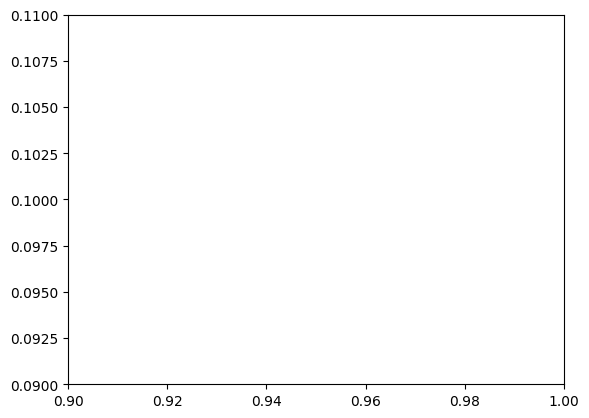

In [ ]:
plt.scatter([val.real for val in vals], [val.imag for val in vals], s=0.0001)
plt.xlim(0.9, 1)
plt.ylim(0.1-0.01, 0.1+0.01)
plt.scatter([val.real for val in filtered_vals], [val.imag for val in filtered_vals], s=1)

In [ ]:
len(filtered_sols)

0

In [ ]:
ZSqrt2Int((1, 0)) - ZetaInt((-44889, 47227, -21899, -16257)).abs_sq()

ZSqrt2Int((-4989268099, 3527945306))

How would we factorize some $\xi \in \mathbb{Z}[\sqrt{2}]$? 

Preliminaries:
- $\xi \xi^\bullet = n \in \mathbb{Z}$
- Lemma C.12: If $p$ prime, we can factor $p$ in $\mathbb{Z}[\sqrt{2}]$; depending on the modularity, the factorization will either be $p$, $\sqrt{2}$, or $\nu^\bullet \nu$ for some $\nu \in \mathbb{Z}[\sqrt{2}]$

So:
$\xi = \prod \nu_k^{m_k}$ for some primes $\nu_k \in \mathbb{Z}[\sqrt{2}]$. Furthermore, $\xi \xi^\bullet = \prod \nu_k^{m_k} \prod (\nu_k^\bullet)^{m_k}$ while $n = \prod p_k^{g_k}$. Then,
- If $\nu_k = \sqrt{2}$, then we would simply see some $p_k = 2$
- If $\nu_k$ also an integer prime, then it also will persist
- If $\nu_k$ neither, then we will see the prime $p_k = \nu_k^\bullet \nu_k$ 

Our protocol is thus:
1. Compute $n = \xi^\bullet \xi$ and factorize into its prime factors $\prod p_k^g_k$
2. If $p_k = 2$, then it can be factorized into $\sqrt{2}$ with some unit factor
3. If $p_k \equiv 3, 5 \bmod 8$, it itself is prime in $Z[\sqrt{2}]$ and is ``inert", i.e. needs to have even exponent. The factorization of $\xi$ will contain $p_k$ with halved power. 
4. If $p_k \equiv 1, 7 \bmod 8$, it can be factorized into $\nu^\bullet \cdot \nu$, so the factorization of $\xi$ will contain $\nu$

NameError: name 'solve_quadratic_residue' is not defined

In [43]:
def factorize_prime_zsqrt2(p: int):
    """Assumes p prime and positive.
    Lemma C.12 from Selinger synthesis
    produces the factorization of xi in Z[\sqrt{2}]

    Args:
        p (int): prime

    Raises:
        ValueError: Can fail if quadratic residue finding fails

    Returns:
        List: Factorization of p in Z[\sqrt{2}]
    """
    
    assert p > 1
    
    if p == 2:
        return [ZSqrt2Int((0, 1)), ZSqrt2Int((0, 1))]

    modulo = p % 8
    
    if modulo == 3 or modulo == 5:
        return [ZSqrt2Int((p, 0))]
    
    # we are in the hard case of modulo == 1, 7
    # so that p ~ xi^* xi
    
    # first, compute satisfying x where $x^2 = 2 mod p$
    x_val = solve_quadratic_residue(2, p)
    
    if not x_val:
        raise ValueError("Should not happen")
    
    # now, xi = gcd(p, x + \sqrt{2})
    # so x + \sqrt{2} = xi * y for some y
    # suppose xi = a + b\sqrt{2}
    # so (x + \sqrt{2}) * (a - b \sqrt{2}) = xi^* * xi * y = p * y' 
    x_val = ZSqrt2Int((x_val, 1))
    xi = gcd(ZSqrt2Int((p, 0)), x_val)
    
    return [xi, ~xi]

def factorize_zsqrt2(xi: ZSqrt2Int):
    # n = \xi^\bullet * xi
    n = ~xi * xi
    n = np.abs(n.coeffs[0])
    int_factorization = factorint(n)
    zsq2_factorization = []
    
    # print(f"xi={xi}, n={n}, int_factorization={int_factorization}")
    
    for prime, power in int_factorization.items():
        # print(f"prime={prime}, power={power}")
        if prime == 2:
            zsq2_factorization.append((ZSqrt2Int((0, 1)), power))
        elif prime % 8 == 3 or prime % 8 == 5:
            assert power % 2 == 0, f"prime={prime}, power={power}"
            zsq2_factorization.append((ZSqrt2Int((prime, 0)), power // 2))
        elif prime % 8 == 1 or prime % 8 == 7:
            # p = xi^* xi
            # but p^m could be some combination of xi^*, xi
            # need to manually count the number of xi, xi^* factors
            x_val = solve_quadratic_residue(2, prime)
            x_val = ZSqrt2Int((x_val, 1))
            factor_xi = gcd(ZSqrt2Int((prime, 0)), x_val)
            factor_xi_bul = ~factor_xi
            
            for xi_count in range(1, power + 1 + 1):
                _, r = divide(xi, factor_xi**xi_count)
                if r != ZSqrt2Int((0, 0)):
                    break
            
            xi_count -= 1
            
            zsq2_factorization.append((factor_xi, xi_count))
            zsq2_factorization.append((factor_xi_bul, power - xi_count))
        else:
            raise ValueError("Should not happen")
    
    # do some light cleanup
    zsq2_factorization = [(factor, power) for factor, power in zsq2_factorization if power > 0]
    
    return zsq2_factorization

def evaluate_factorization(arr):
    result = ZSqrt2Int((1, 0))
    
    for factor, power in arr:
        result *= factor**power
    
    return result


def solve_quadratic_residue(c: int, p: int, threshold: int = 10000000):
    """Solves x^2 = c mod p

    Args:
        c (int): equiv
        p (int): prime
        threshold (int, optional): Hardness parameter. Defaults to 10000000.

    Returns:
        int: such that x^2 = c mod p
    """
    # solves x^2 = c mod p
    
    k = 0
    while True:
        # need x^2 - c = 0 mod p
        residue = (k**2 - c) % p
        if residue == 0:
            return k
        k += 1
    
    return False

def gcd(a: ZSqrt2Int, b: ZSqrt2Int):
    # print(f"a={a}, b={b}")
    zero = ZSqrt2Int((0, 0))
    if a == zero or b == zero:
        return a + b
    
    _, r = divide(a, b)
    
    return gcd(b, r)
    
    
def divide(a: ZSqrt2Int, b: ZSqrt2Int):
    # computes a / b, returning q, r
    # we want to find q, r such that a = bq + r
    # (a + b \sqrt{2}) / (c + d \sqrt{2}) = (a + b\sqrt{2}) * (c - d\sqrt{2]}) / (c^2 - 2d^2)
    numerator = a * ~b
    denominator = (b * ~b).coeffs[0]
    
    q_int = (numerator.coeffs[0] + denominator // 2) // denominator
    q_sq2 = (numerator.coeffs[1] + denominator // 2) // denominator
    
    q = ZSqrt2Int((q_int, q_sq2))
    if q == ZSqrt2Int((0, 0)):
        # we may need to take a more aggressive approach
        pass
    
    r = a - b * q
    
    return q, r
    

def norm(a: ZSqrt2Int):
    return a.coeffs[0]**2 - 2 * a.coeffs[1]**2


for _ in range(100):
    a = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    b = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    q, r = divide(a, b)
    assert a == b * q + r, f"a={a}, b={b}, q={q}, r={r}"

for _ in range(100):
    a = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    b = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    # print(f"a={a}, b={b}, gcd={gcd_val}")
    gcd_val = gcd(a, b)
    assert divide(a, gcd_val)[1] == ZSqrt2Int((0, 0)), f"a={a}, b={b}, gcd={gcd_val}"
    assert divide(b, gcd_val)[1] == ZSqrt2Int((0, 0)), f"a={a}, b={b}, gcd={gcd_val}"

for _ in range(100):
    zsq2 = ZSqrt2Int((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    print(f"Factoring {zsq2}")
    factorization = factorize_zsqrt2(zsq2)
        
    reconstructed = evaluate_factorization(factorization)
    
    q, r = divide(zsq2, reconstructed)
    assert r == ZSqrt2Int((0, 0)), f"zsq2={zsq2}, reconstructed={reconstructed}, r={r}"
    assert np.abs((~q * q).coeffs[0]) == 1, f"q={q}, q^* q={(~q * q).coeffs[0]}, {factorization}"


Factoring ZSqrt2Int((226, 247))
Factoring ZSqrt2Int((461, -245))
Factoring ZSqrt2Int((-733, -925))
Factoring ZSqrt2Int((620, -418))
Factoring ZSqrt2Int((325, -169))
Factoring ZSqrt2Int((-992, -108))
Factoring ZSqrt2Int((-760, -746))
Factoring ZSqrt2Int((481, 749))
Factoring ZSqrt2Int((885, 214))
Factoring ZSqrt2Int((-180, 791))
Factoring ZSqrt2Int((-697, 348))
Factoring ZSqrt2Int((632, -238))
Factoring ZSqrt2Int((-158, -143))
Factoring ZSqrt2Int((361, -823))
Factoring ZSqrt2Int((-705, 566))
Factoring ZSqrt2Int((878, 25))
Factoring ZSqrt2Int((723, 473))
Factoring ZSqrt2Int((579, -942))
Factoring ZSqrt2Int((-556, 898))
Factoring ZSqrt2Int((14, -953))
Factoring ZSqrt2Int((-220, -180))
Factoring ZSqrt2Int((888, 66))
Factoring ZSqrt2Int((483, 102))
Factoring ZSqrt2Int((-165, -917))
Factoring ZSqrt2Int((203, 447))
Factoring ZSqrt2Int((-595, -417))
Factoring ZSqrt2Int((-963, 685))
Factoring ZSqrt2Int((-455, -914))
Factoring ZSqrt2Int((676, 259))
Factoring ZSqrt2Int((-300, 118))
Factoring ZSqr

In [ ]:
factorize_prime_zsqrt2(23)

[ZSqrt2Int((5, 1)), ZSqrt2Int((5, -1))]

In [44]:
solve_quadratic_residue(2, 158908012961)

KeyboardInterrupt: 

In [ ]:
def divide_omega(u: ZetaInt, v: ZetaInt):
    # we need to do a similar trick as with the other divide function
    # i.e. u / v = u * v^* / v * v^* = x
    # a / b = a * b^\dagger / b * b^\dagger = a * b^\dagger * ~(b *  b^\dagger) / b * b^\dagger * ~(b * b^\dagger)

    # To compute v^*, we have the homomorphism that embeds v -> v^*
    # namely omega -> - omega^3
    # omega^2 -> - omega^2
    # omega^3 -> - omega
        
    v0, v1, v2, v3 = v.coeffs
    v_conj = ZetaInt((v0, -v3, -v2, -v1))
    
    v_v_dag, im = (v * v_conj).to_zsq()
    assert im == ZSqrt2Int((0, 0)), f"im={im}"
    v_bul = ~v_v_dag
    v_bul = v_bul.to_zeta()
    
    numerator = u * v_conj * v_bul
    denominator = v.norm()
    
    x0, x1, x2, x3 = numerator.coeffs
    x0 = rounddiv(x0, denominator)
    x1 = rounddiv(x1, denominator)
    x2 = rounddiv(x2, denominator)
    x3 = rounddiv(x3, denominator)
    
    x = ZetaInt((x0, x1, x2, x3))
    return x, u + v * x * -1

def rounddiv(a, b):
    return (a + b // 2) // b 

def gcd_omega(a: ZetaInt, b: ZetaInt):
    # print(f"a={a}, b={b}")
    zero = ZetaInt((0, 0, 0, 0))
    
    k = 0
    while a != zero and b != zero:
        _, r = divide_omega(a, b)
        
        k += 1
        
        if k > 1000:
            raise ValueError("Should not happen")

        a = b
        b = r
    
    return a + b

for _ in range(100):
    v = ZetaInt((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    u = ZetaInt((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    x, r = divide_omega(u, v)
    assert u == v * x + r, f"u={u}, v={v}, x={x}, r={r}"

for _ in range(1000):
    v = ZetaInt((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    u = ZetaInt((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    print(f"u={u}, v={v}")
    gcd_val = gcd_omega(u, v)
    assert divide_omega(u, gcd_val)[1] == ZetaInt((0, 0, 0, 0)), f"u={u}, v={v}, gcd={gcd_val}"
    assert divide_omega(v, gcd_val)[1] == ZetaInt((0, 0, 0, 0)), f"u={u}, v={v}, gcd={gcd_val}"

u=ZetaInt((168, -554, 933, 294)), v=ZetaInt((807, 378, 152, 19))
u=ZetaInt((-93, 445, -277, 38)), v=ZetaInt((-101, -194, -130, 597))
u=ZetaInt((626, -206, 841, -832)), v=ZetaInt((993, 513, 783, 109))
u=ZetaInt((-535, 358, -475, 939)), v=ZetaInt((434, -549, -882, -27))
u=ZetaInt((442, -496, 669, 38)), v=ZetaInt((762, -947, -385, -312))
u=ZetaInt((-818, 784, 805, 985)), v=ZetaInt((435, 770, 563, -499))
u=ZetaInt((-551, 408, 76, -335)), v=ZetaInt((-556, -357, 234, 877))
u=ZetaInt((-15, -44, 61, -694)), v=ZetaInt((-155, -282, 359, 46))
u=ZetaInt((288, 764, 625, 865)), v=ZetaInt((645, -472, -289, -391))
u=ZetaInt((-620, 722, 510, -879)), v=ZetaInt((957, 303, -26, -214))
u=ZetaInt((773, -139, -509, 760)), v=ZetaInt((-383, 163, 416, 891))
u=ZetaInt((-33, -911, 296, -223)), v=ZetaInt((-393, 429, -346, -91))
u=ZetaInt((453, -447, 936, -456)), v=ZetaInt((-837, -480, -797, -174))
u=ZetaInt((-789, -793, 638, 19)), v=ZetaInt((492, -312, -173, -431))
u=ZetaInt((503, 845, 631, -754)), v=ZetaInt((-855

In [ ]:
for _ in range(100):
    u = ZetaInt((np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)))
    
    # $$
    # a_1^2 + a_3^2 + a_0^2 + a_2^2, (a_1 - a_3) a_0 + (a_1 + a_3) a_2 
    # $$
    
    test_u = (u * ~u).to_zsq()[0]
    test_u = test_u * ~test_u
    test_u = test_u.coeffs[0]
    
    a0, a1, a2, a3 = u.coeffs
    u_norm = (a1**2 + a3**2 + a0**2 + a2**2)**2 - 2 *((a1 - a3) * a0 + (a1 + a3) * a2)**2
    assert u_norm == test_u, f"u={u}, u_norm={u_norm}, test_u={test_u}"
    assert u.norm() == u_norm, f"u={u}, u.norm()={u.norm()}, u_norm={u_norm}"

In [ ]:
u=ZetaInt((-22, 60, -20, -29))
v=ZetaInt((-51, -49, 79, -509))

divide_omega(u, v)

gcd_omega(u, v)


ZetaInt((0, 1, -1, 1))

In [ ]:
divide_omega(ZetaInt((634, 899, 349, -581)), ZetaInt((8119, 5741, 0, -5741)))

(ZetaInt((3349234, -1655578, -1007893, 3080954)), ZetaInt((0, 0, 0, 0)))

want to divide ZetaInt((634, 899, 349, -581)) by ZetaInt((8119, 5741, 0, -5741))


a / b = a * b^\dagger / b * b^\dagger = a * b^\dagger * ~(b *  b^\dagger) / b * b^\dagger * ~(b * b^\dagger)




Which is in theory ZetaInt((8119, -5741, 0, 5741)) * ZetaInt((-1, 0, 0, 0)) * ZetaInt((634, 899, 349, -581))
or ZetaInt((3349234, -1655578, -1007893, 3080954))

We solve by doing:

ZetaInt((634, 899, 349, -581)) * ZetaInt((8119, -5741, 0, 5741)) * (ZetaInt((8119, 5741, 0, -5741)) * ZetaInt((8119, 5741, 0, -5741))) * 2 / ZetaInt((8119, 5741, 0, -5741)) * ZetaInt((8119, 5741, 0, -5741)) * ~ * 2

In [ ]:
def factorize_zomega(xi: ZSqrt2Int):
    # given some prime xi, factorize it in Z[\omega]
    divide_into_prime: int = None
        
    if xi.coeffs[1] == 0:
        divide_into_prime = xi.coeffs[0]
    else:
        divide_into_prime = abs((xi * ~xi).coeffs[0])
    
    assert divide_into_prime > 1
    
    if divide_into_prime == 2:
        return ZetaInt((1, 1, 0, 0)) # 1 + omega
    elif divide_into_prime % 8 in [1, 5]:
        u = solve_quadratic_residue(-1, divide_into_prime)
        t = gcd_omega(xi.to_zeta(), ZetaInt((u, 0, 1, 0))) # gcd (xi, u + i)
        return t
    elif divide_into_prime % 8 in [3]:
        u = solve_quadratic_residue(-2, divide_into_prime)
        t = gcd_omega(xi.to_zeta(), ZetaInt((u, 1, 0, 1))) # gcd (xi, u + i sqrt(2))
        return t
    else:
        return False

In [ ]:
factorize_prime_zsqrt2(19)

[ZSqrt2Int((19, 0))]

In [ ]:
factorize_zomega(ZSqrt2Int((19, 0)))

ZetaInt((1, -3, 0, -3))

In [ ]:
ZetaInt((1, -3, 0, -3)) * ~ZetaInt((1, -3, 0, -3))

ZetaInt((19, 0, 0, 0))

In [ ]:
def factorize_unit(xi: ZSqrt2Int):
    """Given unit xi find its factorization in terms of Z[\sqrt{2}] units

    Args:
        xi (ZSqrt2Int): Unit
    """
    
    assert xi * ~xi == ZSqrt2Int((1, 0)) or xi * ~xi == ZSqrt2Int((-1, 0)), f"Not unit! xi={xi}"
    
    # all units in Z[\sqrt{2}] take the form (-1)^n \lambda^m for \lambda = 1+\sqrt{2} and \lambda^{-1} = -1 + \sqrt{2}
    
    # first: identify if we have \lambda or \lambda^{-1} by checking signs
    same_sgn = xi.coeffs[0] * xi.coeffs[1] > 0
    
    factor_term: ZSqrt2Int = None
    if same_sgn:
        factor_term = ZSqrt2Int((1, 1))
    else:
        factor_term = ZSqrt2Int((-1, 1))
    
    power = 0
    while xi != ZSqrt2Int((1, 0)) and xi != ZSqrt2Int((-1, 0)):
        xi = xi * ~(factor_term * -1)
        power += 1
        
        # print(f"xi={xi}")
        if power > 100:
            raise ValueError("Should not happen")
    
    neg_factor = 1 if xi == ZSqrt2Int((1, 0)) else -1
    
    return factor_term, power, neg_factor

def factorize_xi(xi: ZSqrt2Int):
    # Lemma C.12 from Selinger synthesis
    # produces the factorization of xi in Z[\sqrt{2}]
    # assume xi positive
    # the key idea is that we will first use the norm-based factorization yielding a series of primes
    # each prime is uniquely identified with a prime in Z[\sqrt{2}]
    
    assert xi.eval(), f"p={xi}"
    
    omega_factorization = []
    
    # 1. Factor xi into primes over Z[\sqrt2]
    zsq2_factorization = factorize_zsqrt2(xi)
    value = evaluate_factorization(zsq2_factorization)
    
    curr_val = ZetaInt((1, 0, 0, 0))
    # 2. For each prime, obtain the factorization in Z[\omega]
    for prime, power in zsq2_factorization:
        # identify prime where xi | p
        
        if power % 2 == 0:
            omega_factorization.append((prime.to_zeta(), power // 2))
            curr_val *= prime.to_zeta()**(power // 2)
        else:
            t_factor = factorize_zomega(prime)
            
            if not t_factor:
                # We have an inert factor and the power is odd; we have failed.
                return False
            
            omega_factorization.append((t_factor, power))
            curr_val *= t_factor**power
    
    # 3. Factorize the unit leader
    # because both quantities are doubly positive, this should just be the square root of the unit
    curr_val = curr_val * ~curr_val
    difference, _ = divide_omega(xi.to_zeta(), curr_val)
    difference = difference.to_zsq()[0]
    term, power, neg = factorize_unit(difference)
    
    to_add = term.to_zeta()
    if neg == -1:
        raise ValueError("Should not happen")
    
    if power // 2 > 0:
        
        omega_factorization.append((to_add, power // 2))
    
    return omega_factorization

factorize_unit(ZSqrt2Int((-7, 5)))
factorize_xi(ZSqrt2Int((3175, 228)))

[(ZetaInt((-4, 2, -1, -2)), 1), (ZetaInt((-7, 13, 15, 18)), 1)]

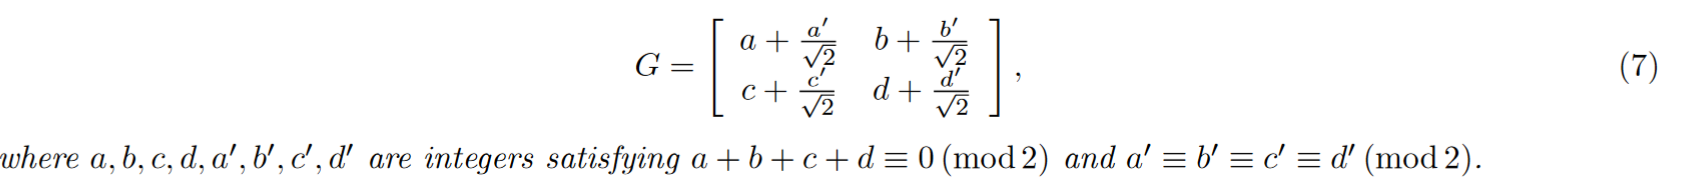

In [41]:
1935588184 / 8, 1369824368 / 8

UFuncTypeError: ufunc 'gcd' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

In [ ]:
$ 1 - (a + a'/\sqrt{2})**2 = 1 - (a )

In [ ]:
a0r_min, a0r_max, a0i_min, a0i_max = find_bounds(0.9, 0.1, 1e-15)

# our new approach will be to create a special grid operator that rotates the box around the region so that the box is aligned with the axes

# note that the box's midline is at the angle theta, so we just need to rotate the box by -theta
# however, our special grid operator needs to be integer, so we need to take an arbitrarily good approximation of cos theta, sin theta using integers
# in particular:

# (a + a'/\sqrt{2})(a + a'/\sqrt{2}) = a^2 + a a' \sqrt{2} + a'^2/2
# (b + b'/\sqrt{2})(-1)(b + b'/\sqrt{2}) = -1 (b^2 + b b' \sqrt{2} + b'^2/2)
# require that a^2 + aa' \sqrt{2} + a'^2 /2 + b^2 + bb' \sqrt{2} + b'^2/2 = 1
# ideally want a a' = - b b'
# what if a' = -b'? then a = b, so a^2 + a a' \sqrt{2} + a'^2 / 2 + a^2 - b b' \sqrt{2} + a'^2 / 2
# so a^2 + a'^2 /2 + a^2 + a'^2 /2 = 2 a^2 + a'^2 = 1


b_min = -1
b_max = 1
bi_min = -1
bi_max = 1

k = 32
a_offset = np.sqrt(2)**k
b_offset = np.sqrt(2)**k

a_vals = np.array([a0r_min, a0r_max, a0i_min, a0i_max])
b_vals = np.array([b_min, b_max, bi_min, bi_max]) * b_offset

a0r_min, a0r_max, a0i_min, a0i_max = a_vals
b_min, b_max, bi_min, bi_max = b_vals

enlargement = 1
potn_sols = enumerate_2d(a0r_min, a0r_max, a0i_min, a0i_max, b_min, b_max, bi_min, bi_max)
filtered_solns = [sol for sol in potn_sols if check_in_region(sol.eval() / a_offset, 0.9, 0.1, 1e-7)]
print(filtered_solns)

[]


In [ ]:
for sol in filtered_solns:
    # print(np.abs(sol.eval())**2)
    xi_val = ZSqrt2Int((2**k, 0)) - (sol * ~sol).to_zsq()[0]
    # print(xi_val)
    
    factorization = factorize_xi(xi_val)
    if factorization:
        val = ZetaInt((1, 0, 0, 0))
        for factor, power in factorization:
            val *= factor**power
        assert sol * ~sol + val * ~val == ZetaInt((2**k, 0, 0, 0)), f"sol={sol}, val={val}"
        print(sol, val)
    

In [ ]:
ZetaInt((47, 220, -87, -62)) * ~ZetaInt((47, 220, -87, -62)) + ZetaInt((-30, 43, 18, 21)) * ~ZetaInt((-30, 43, 18, 21))

ZetaInt((65536, 0, 0, 0))